In [2]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np

In [3]:
one_step_circuit =QuantumCircuit(6, name = ' ONE STEP')

#coin operator 
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw()

q_0: ──────────────────
                       
q_1: ──────────────────
                       
q_2: ──────────────────
                       
q_3: ──────────────────
     ┌───┐┌───┐   ┌───┐
q_4: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_5: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [4]:
#shift operator func for 4d hybercbe

def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i % 2 == 0:
            circuit.x(5)
        circuit.ccx(4,5,i)
shift_operator(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()
one_step_circuit.draw()

┌───┐                              
q_0: ───────────────────────┤ X ├──────────────────────────────
                            └─┬─┘     ┌───┐                    
q_1: ─────────────────────────┼───────┤ X ├────────────────────
                              │       └─┬─┘     ┌───┐          
q_2: ─────────────────────────┼─────────┼───────┤ X ├──────────
                              │         │       └─┬─┘     ┌───┐
q_3: ─────────────────────────┼─────────┼─────────┼───────┤ X ├
     ┌───┐┌───┐   ┌───┐┌───┐  │  ┌───┐  │  ┌───┐  │  ┌───┐└─┬─┘
q_4: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──
     ├───┤├───┤ │ ├───┤├───┤  │  └───┘  │  ├───┤  │  └───┘  │  
q_5: ┤ H ├┤ Z ├─■─┤ H ├┤ X ├──■─────────■──┤ X ├──■─────────■──
     └───┘└───┘   └───┘└───┘               └───┘

In [5]:
#make controlled gates
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

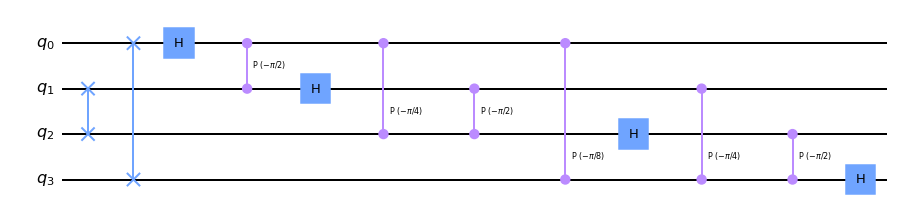

In [6]:
inv_qft_gate = QFT(4, inverse = True).to_instruction()
qft_gate = QFT(4, inverse = False).to_instruction()

QFT(4, inverse= True).decompose().draw("mpl")